In [1]:
#DERS 37

In [2]:
import yfinance as yf #pip install yahoo-finance
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sklearn.metrics as mt

In [3]:
data = yf.download("THYAO.IS",start="2022-08-01",end="2022-09-01")
df = data.copy()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508
2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705
2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485
2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850
2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394


In [4]:
#Sadece Adj Close ve Tarihi alıyoruz
#Tarih indekslenmiş olduğu için onu öncelikle indeksten kurtarıyoruz
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508
1,2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705
2,2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485
3,2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850
4,2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394


In [5]:
#Tarih sütununu parçalayıp sadece gün değerini almak istiyorum
df["Date"]

0    2022-08-01
1    2022-08-02
2    2022-08-03
3    2022-08-04
4    2022-08-05
5    2022-08-08
6    2022-08-09
7    2022-08-10
8    2022-08-11
9    2022-08-12
10   2022-08-15
11   2022-08-16
12   2022-08-17
13   2022-08-18
14   2022-08-19
15   2022-08-22
16   2022-08-23
17   2022-08-24
18   2022-08-25
19   2022-08-26
20   2022-08-29
21   2022-08-31
Name: Date, dtype: datetime64[ns]

In [6]:
df["Date"].astype(str) #Parçalama işlemi yapabilmek için öncelikle str'e çevirmemiz gerekiyor

0     2022-08-01
1     2022-08-02
2     2022-08-03
3     2022-08-04
4     2022-08-05
5     2022-08-08
6     2022-08-09
7     2022-08-10
8     2022-08-11
9     2022-08-12
10    2022-08-15
11    2022-08-16
12    2022-08-17
13    2022-08-18
14    2022-08-19
15    2022-08-22
16    2022-08-23
17    2022-08-24
18    2022-08-25
19    2022-08-26
20    2022-08-29
21    2022-08-31
Name: Date, dtype: object

In [7]:
df["Date"].astype(str).str.split("-")

0     [2022, 08, 01]
1     [2022, 08, 02]
2     [2022, 08, 03]
3     [2022, 08, 04]
4     [2022, 08, 05]
5     [2022, 08, 08]
6     [2022, 08, 09]
7     [2022, 08, 10]
8     [2022, 08, 11]
9     [2022, 08, 12]
10    [2022, 08, 15]
11    [2022, 08, 16]
12    [2022, 08, 17]
13    [2022, 08, 18]
14    [2022, 08, 19]
15    [2022, 08, 22]
16    [2022, 08, 23]
17    [2022, 08, 24]
18    [2022, 08, 25]
19    [2022, 08, 26]
20    [2022, 08, 29]
21    [2022, 08, 31]
Name: Date, dtype: object

In [8]:
df["Date"].astype(str).str.split("-").str[2] # str[2] = Listenin içinde index numarası 2 olanları getiriyoruz

0     01
1     02
2     03
3     04
4     05
5     08
6     09
7     10
8     11
9     12
10    15
11    16
12    17
13    18
14    19
15    22
16    23
17    24
18    25
19    26
20    29
21    31
Name: Date, dtype: object

In [9]:
df["Day"] = df["Date"].astype(str).str.split("-").str[2]

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508,01
1,2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705,02
2,2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485,03
3,2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850,04
4,2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394,05


In [11]:
y = df["Adj Close"]
X = df["Day"]

In [12]:
#Veri setimiz küçük olduğu için train ve test ile çalışmayacağımız için verileri numpy ile array'e çeviriyoruz
y = np.array(y).reshape(-1,1)
X = np.array(X).reshape(-1,1)

In [13]:
#Verileri SVR modeline çevirmeden önce standartlaştırma işlemi yapıyoruz
scy = StandardScaler()
scx = StandardScaler()

X = scx.fit_transform(X)
y = scy.fit_transform(y)

In [14]:
svr_rbf = SVR(kernel="rbf", C=10000)
svr_rbf.fit(X,y.ravel())
tahminRBF = svr_rbf.predict(X)

svr_lin = SVR(kernel="linear")
svr_lin.fit(X,y.ravel())
tahminLIN = svr_lin.predict(X)

svr_poly = SVR(kernel="poly",degree=5)
svr_poly.fit(X,y.ravel())
tahminPOLY = svr_poly.predict(X)

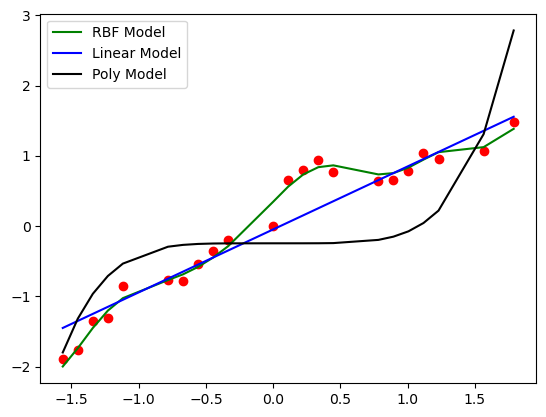

In [15]:
plt.scatter(X,y, color="red")
plt.plot(X,tahminRBF,color="green",label="RBF Model")
plt.plot(X,tahminLIN,color="blue",label="Linear Model")
plt.plot(X,tahminPOLY,color="black",label="Poly Model")
plt.legend()
plt.show()

R2: 0.9862389491922449 RMSE: 0.11730750533429263


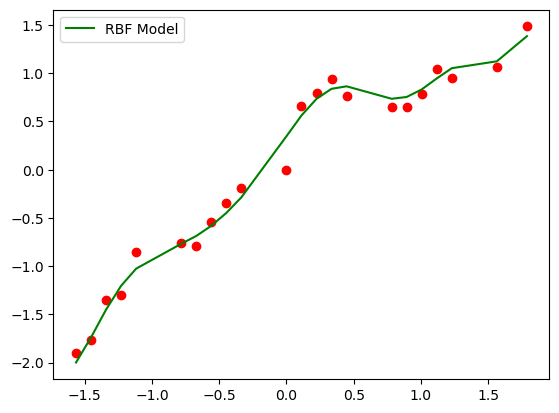

In [16]:
#En iyi çalıştığını gözlemlediğimiz yapı RBF modeli oluyor

r2 = mt.r2_score(y,tahminRBF)
rmse = mt.mean_squared_error(y,tahminRBF,squared=False)

print(f"R2: {r2} RMSE: {rmse}")

plt.scatter(X,y, color="red")
plt.plot(X,tahminRBF,color="green",label="RBF Model")
plt.legend()
plt.show()

In [17]:
#DERS 38

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
#Hyperparametre işlemlerini halletme

#kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

#degree: int, default=3

#gamma: {‘scale’, ‘auto’} or float, default=’scale’

#Cfloat, default=1.0

In [20]:
parametreler = {
    "C": [1,10,100,10000],#Bu liste içine bir aralık veya sabit bir değer verebilirim. Yani aslında demek istenilen şu:
    #Sen hangi aralıkta denenmesini istiyorsun. 1 diye deneyecek, 10 diye deneyecek, 100 diye deneyecek
    #en son da 10000 diye deneyecek. Aralarında en optimal oranı kullanıcak
    "gamma": [1,0.1,0.001],
    "kernel": ["linear", "poly", "rbf"]
}
#estimator= Yöntem
#param_grid= Denenmesini istediğim parametreler
tuning = GridSearchCV(estimator=SVR(),param_grid=parametreler,cv=10)
tuning.fit(X,y.ravel())
print(tuning.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#Optimal olmadan önce normal şekilde yaptığımızda aldığımız değerler bunlar
svr_rbf = SVR()
svr_rbf.fit(X,y.ravel())
tahminRBF = svr_rbf.predict(X)

r2 = mt.r2_score(y,tahminRBF)
rmse = mt.mean_squared_error(y,tahminRBF,squared=False)

print(f"R2: {r2} RMSE: {rmse}")

plt.scatter(X,y, color="red")
plt.plot(X,tahminRBF,color="green",label="RBF Model")
plt.legend()
plt.show()

In [ ]:
#Optimal olarak yaptığımızda aldığımız değerler bunlar
svr_rbf = SVR(kernel="rbf",C=100,gamma=1)
svr_rbf.fit(X,y.ravel())
tahminRBF = svr_rbf.predict(X)

r2 = mt.r2_score(y,tahminRBF)
rmse = mt.mean_squared_error(y,tahminRBF,squared=False)

print(f"R2: {r2} RMSE: {rmse}")

plt.scatter(X,y, color="red")
plt.plot(X,tahminRBF,color="green",label="RBF Model")
plt.legend()
plt.show()